In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Using New Calculations to Determine $\sigma_Q$

In the note `QEr_2D_joint.ipynb` we found the two-dimensional Q-$\tilde{E}_r$ distribution that we expect, given a certain Edelweiss detector resolution from their 2004 paper [REF]. Here, we compare the Edw. expectation for the yield (Q) width to what one would expect given those two-dimensional distributions. We also compare to data generated in our "physically correct" style (see `ms_correction.ipynb`). 



In [2]:
#get the resolutions for GGA3
import EdwRes as er

aH=0.0386
V=4.0
C=0.0
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = er.getEdw_det_res('GGA3',V,'data/edw_res_data.txt',aH,C)

In [3]:
#make an electron-recoil data set
import observable_simulations as osim
Qer,Erer = osim.simQEr_ER('GGA3',V=V,aH=aH,C=C,F=0.0,HighER=300)

print(Erer)

[147.43637413  62.37006541 190.85295567 ... 105.9377997  256.56768246
  39.3096899 ]


In [4]:
#get statistics given a certain binning
import histogram_yield as hy
#bins = [0,20,40,60,80,100,120,140,160,180,200]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
bins = np.asarray(bins)
xE = (bins[:-1] + bins[1:]) / 2

bindf,bindfE = hy.QEr_Ebin(Qer, Erer, bins=bins,silent=True)
qbootsigs,qbootsigerrsl,qbootsigerrsu = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs = hy.QEr_QbootBC(bindfE,qbootsigs,xE,20,bins,silent=True)

print(qbootsigs)
print(qbootsigerrsl)
print(qbootsigerrsu)
print(qbootcorrs)

[31.56007659  0.14834005  0.09306295  0.07242937  0.06208638  0.05655143
  0.05312991  0.05091341  0.04940587  0.04826473  0.04726368  0.04658674
  0.04607597  0.04565563  0.04557854  0.04523197  0.04491829  0.04470125
  0.04461471  0.04475129]
[1.07230385e+01 7.17533497e-04 4.12280431e-04 3.21809118e-04
 2.67207034e-04 2.51057139e-04 2.35152012e-04 2.23798089e-04
 2.25664189e-04 2.15056624e-04 2.11433908e-04 2.09699056e-04
 2.06505845e-04 2.08263660e-04 2.10895190e-04 2.03583474e-04
 2.01446483e-04 2.03924400e-04 2.02317608e-04 2.01012092e-04]
[1.21018041e+01 7.10986341e-04 4.24268286e-04 3.23218745e-04
 2.75013203e-04 2.52844210e-04 2.41214046e-04 2.29482047e-04
 2.23144720e-04 2.19598905e-04 2.09244084e-04 2.03418454e-04
 2.13359236e-04 2.03220301e-04 2.06457222e-04 2.06095103e-04
 2.01427440e-04 1.97548224e-04 2.03437954e-04 2.00875005e-04]
[115.10042181   0.21325508   0.99060009   0.99654427   0.9976356
   0.99821197   0.99861814   0.99886928   0.99902618   0.99915135
   0.9992650

In [5]:
import fano_calc as fc

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/res_calc.h5')

print(np.shape(E))

GGA3/ER/4.0/1.000E-04/0.039/000/
True
(200,)


In [6]:
# import data from Edelweiss
import pandas as pds
res_data = pds.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

resER_data = pds.read_csv("data/edelweiss_ERwidth_GGA3_data.txt", skiprows=1, \
                         names=['E_recoil', 'sig_ER', 'sig_ER_err'], \
                         delim_whitespace=True)

resER_data = resER_data.sort_values(by='E_recoil')

print (res_data.head(10))
E_recoil = res_data["E_recoil"]
sig_NR = res_data["sig_NR"]
sig_NR_err = res_data['sig_NR_err']
E_recoil_ER = resER_data["E_recoil"]
sig_ER = resER_data["sig_ER"]
sig_ER_err = resER_data['sig_ER_err']

   E_recoil    sig_NR  E_recoil_err  sig_NR_err
0   16.1946  0.062345      0.946176    0.001157
1   16.4428  0.062345      0.945278    0.001157
2   44.2627  0.046528      0.992477    0.001543
3   24.5012  0.059397      0.992477    0.001185
4   97.7172  0.044847      1.033260    0.002783
5   58.4014  0.050082      0.991830    0.002288
6   34.2156  0.053417      1.033260    0.001102


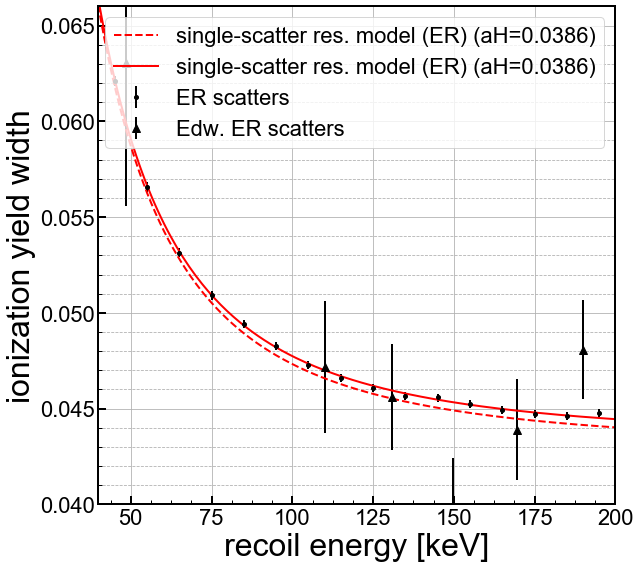

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)




ymin = 0.04
ymax = 0.066



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(40, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/ER_match.png')
plt.show()

In [8]:
#do this for NR singles as well
import observable_simulations as osim
import histogram_yield as hy

Q,Ernr,Q_ss,Ernr_ss = osim.simQEr('GGA3',V=V,aH=aH,C=C,highstats=True)
bindf,bindfE = hy.QEr_Ebin(Q_ss, Ernr_ss, bins=bins,silent=True)
qbootsigs_nr,qbootsigerrsl_nr,qbootsigerrsu_nr = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs_nr = hy.QEr_QbootBC(bindfE,qbootsigs_nr,xE,20,bins,silent=True)

print(qbootsigs_nr)
print(qbootsigerrsl_nr)
print(qbootsigerrsu_nr)
print(qbootcorrs_nr)

[8.10775778e+01 8.79991625e-02 5.18978043e-02 3.90268920e-02
 3.02884542e-02 2.57874607e-02 2.28425148e-02 2.03759589e-02
 1.88831108e-02 1.87052238e-02 1.78160263e-02 1.77791010e-02
 1.71477305e-02 1.54577727e-02 1.33000381e-02 1.64342595e-02
 1.53861442e-02 1.33907749e-02 1.33128417e-02 1.60829068e-02]
[5.09038749e+01 1.28463717e-03 1.02659093e-03 9.18764324e-04
 9.26493399e-04 9.48106593e-04 9.37057969e-04 9.46493679e-04
 9.79759460e-04 1.16082748e-03 1.22740050e-03 1.39121130e-03
 1.46247554e-03 1.84415998e-03 1.73033701e-03 2.08426002e-03
 1.87583424e-03 1.92666385e-03 1.90819102e-03 3.43982315e-03]
[6.36439148e+01 1.32511634e-03 1.03374285e-03 9.45657151e-04
 9.76975988e-04 9.63805009e-04 9.32329528e-04 9.60650772e-04
 1.01015579e-03 1.23312902e-03 1.27430528e-03 1.50622156e-03
 1.60082364e-03 1.91141487e-03 1.89355981e-03 2.27225114e-03
 2.07536059e-03 2.19724836e-03 2.45685192e-03 4.46906235e-03]
[5.54138858e+02 1.68952960e-01 9.61700016e-01 9.81187155e-01
 9.85807597e-01 9.875

In [9]:
#get the NR calculations for our yield band
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',band='NR',alpha=(1/18.0))

#Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR')
print(np.shape(Enr))
print(signr[0])

GGA3/NR/4.0/5.556E-02/0.039/000/
True
(200,)
0.16120731279876183


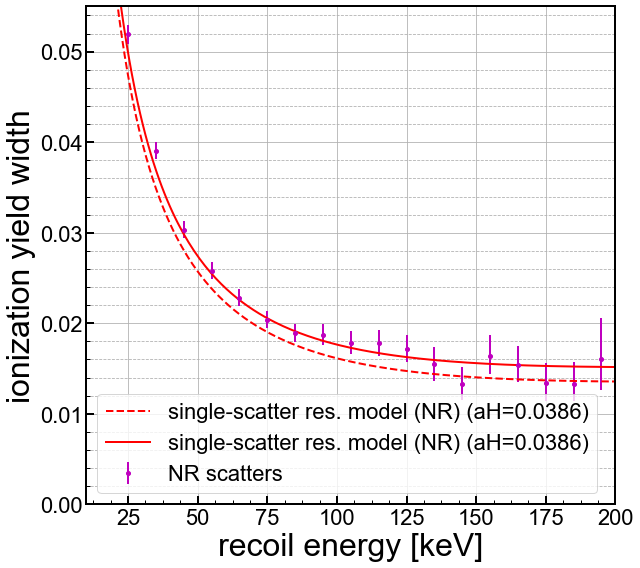

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs_nr, yerr=(qbootsigerrsl_nr,qbootsigerrsu_nr), \
         color='m', marker='o', markersize=4,linestyle='none',label='NR scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NR_ss_match.png')
plt.show()

In [11]:
#make a multiples-scatter plot
bindf_ms,bindfE_ms = hy.QEr_Ebin(Q, Ernr, bins=bins,silent=True)
qbootsigs_nr_ms,qbootsigerrsl_nr_ms,qbootsigerrsu_nr_ms = hy.QEr_Qboot(bindf_ms,bins,silent=True)

In [12]:
#let's make a callable out of the predicted single-scatter resolution
import scipy.interpolate as inter

sigQnr_c = inter.InterpolatedUnivariateSpline(Enr, signr, k=3)
sigQnr_c_v = np.vectorize(sigQnr_c)
print(sigQnrv(150))
print(sigQnr_c_v(150))

0.014024865222086066
0.015590296261144181


In [13]:
#also construct a residual function for use with lmfit
import lmfit as lmf

def residual(params, x, data, eps_data,sigQfunc):
    Cms = params['Cms']
    m = params['m']


    model = np.sqrt(sigQfunc(x)**2 + (Cms+m*x)**2)

    return (data-model) / eps_data

def residual_const(params, x, data, eps_data,sigQfunc):
    Cms = params['Cms']


    model = np.sqrt(sigQfunc(x)**2 + (Cms)**2)

    return (data-model) / eps_data

#do it with lmfit
params = lmf.Parameters()
params.add('Cms', value=0.02)
lmfout = lmf.minimize(residual_const, params, args=(xE, qbootsigs_nr_ms, qbootsigerrsu_nr_ms,sigQnr_c_v))
#print(lmf.fit_report(lmfout))
print('lmfit result--multiples: constant C')
print(lmf.report_fit(lmfout.params))

Cms_const = lmfout.params['Cms'].value

params = lmf.Parameters()
params.add('Cms', value=0.02)
params.add('m', value=0)
lmfout = lmf.minimize(residual, params, args=(xE, qbootsigs_nr_ms, qbootsigerrsu_nr_ms,sigQnr_c_v))
#print(lmf.fit_report(lmfout))
print('lmfit result--multiples: linear C')
print(lmf.report_fit(lmfout.params))

Cms = lmfout.params['Cms'].value
slope = lmfout.params['m'].value

lmfit result--multiples: constant C
[[Variables]]
    Cms:  0.02443249 +/- 7.6850e-04 (3.15%) (init = 0.02)
None
lmfit result--multiples: linear C
[[Variables]]
    Cms:  0.02028581 +/- 0.00147468 (7.27%) (init = 0.02)
    m:    5.3042e-05 +/- 1.6609e-05 (31.31%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Cms, m) = -0.901
None


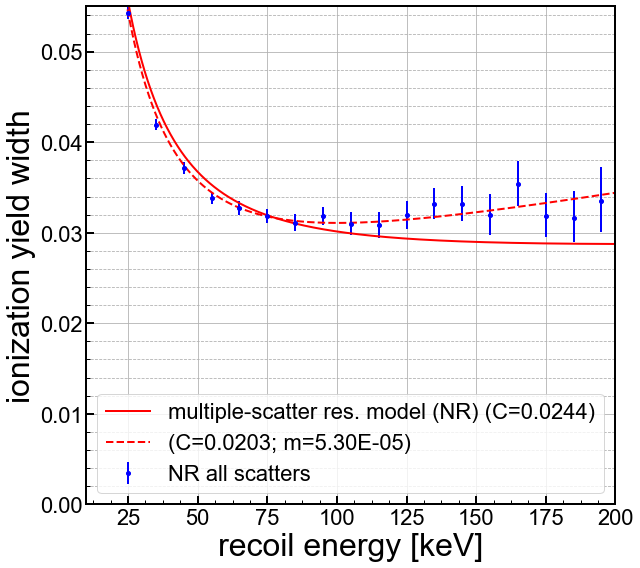

In [14]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)



ax1.plot(X,np.sqrt(sigQnr_c_v(X)**2+Cms_const**2),color='r',linestyle="-",linewidth=2, \
         label='multiple-scatter res. model (NR) (C={:01.3})'.format(Cms_const))
ax1.plot(X,np.sqrt(sigQnr_c_v(X)**2+(Cms+X*slope)**2),color='r',linestyle="--",linewidth=2, \
         label='(C={:01.3}; m={:01.2E})'.format(Cms,slope))
ax1.errorbar(xE,qbootsigs_nr_ms, yerr=(qbootsigerrsl_nr_ms,qbootsigerrsu_nr_ms), \
         color='b', marker='o', markersize=4,linestyle='none',label='NR all scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NR_ms_match.png')
plt.show()